In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
np.__version__

'1.15.1'

## The Logistic Function

This is closely related to the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function):

$$ S(t) = \frac{e^t}{1+e^{-t}} = \frac{1}{1+e^{-t}}$$

The sigmoid is a special case of the logistic function. Let $t$ be a linear combination $t = \beta_0 + \beta_1 x$

The [logistic function](https://en.wikipedia.org/wiki/Logistic_regression#Definition_of_the_logistic_function) is an _s-curve_ that maps the entire domain of $x$ into the range $(0,1)$.  

$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}} = \frac{1}{1+e^{-(\beta_0+\beta_1X)}}$$

where $p(x)$ is the probability of a class. Solve
$$\frac{p(x)}{1-p(x)} = e^{\beta_0+\beta_1x}$$

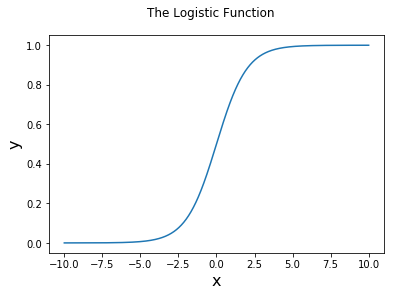

In [2]:
xs = np.linspace(-10, 10, 1000)
ys = np.exp(xs)/(1 + np.exp(xs))

plt.plot(xs,ys)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.suptitle('The Logistic Function')

plt.show()

## study hours example

https://en.wikipedia.org/wiki/Logistic_regression#Example:_Probability_of_passing_an_exam_versus_hours_of_study

In [3]:
import pandas
hours=[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
passfail=[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]
df=pandas.DataFrame(hours)
df.columns=['hours']
df['passfail']=passfail
df

,hours,passfail
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours,20.0,2.7875,1.507165,0.5,1.6875,2.625,4.0625,5.5
passfail,20.0,0.5000,0.512989,0.0,0.0000,0.500,1.0000,1.0


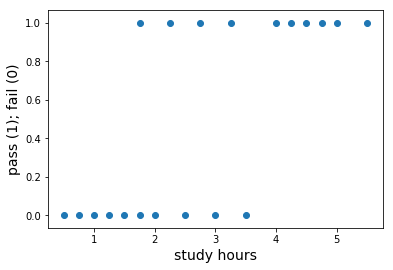

In [18]:
_=plt.scatter(x=hours,y=passfail)
_=plt.xlabel('study hours',fontsize=14)
_=plt.ylabel('pass (1); fail (0)',fontsize=14)

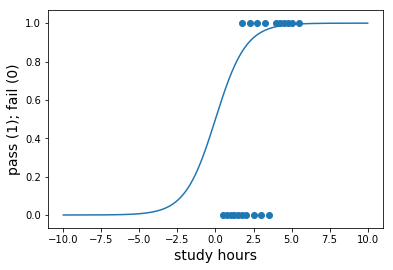

In [20]:
xs = np.linspace(-10, 10, 1000)
b0=0
b1=1
ys = 1/(1 + np.exp(-1*(b0 + b1*xs)))

_=plt.plot(xs,ys)
_=plt.scatter(x=hours,y=passfail)
_=plt.xlabel('study hours',fontsize=14)
_=plt.ylabel('pass (1); fail (0)',fontsize=14)

## subset of iris dataset

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
    
and 

https://github.com/martinpella/logistic-reg/blob/master/logistic_reg.ipynb

In [6]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

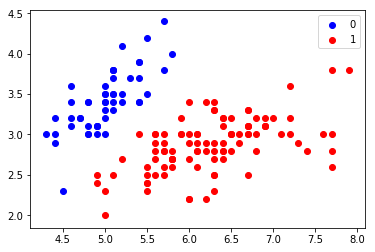

In [7]:
#plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [8]:
theta = np.zeros(X.shape[1])

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.dot(X, theta)
h = sigmoid(z)

In [10]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [11]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [12]:
def fit(self, X, y):
    if fit_intercept:
        X = add_intercept(X)
        
    # weights initialization
    theta = np.zeros(X.shape[1])
        
    for indx in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient
            
        z = np.dot(X, self.theta)
        h = sigmoid(z)
        loss = loss(h, y)
                
        if(indx % 10000 == 0):
            print('loss: '+str(loss)+' \t')

In [13]:
def predict_prob(X):
    if fit_intercept:
        X = add_intercept(X)
    
    return sigmoid(np.dot(X, self.theta))
    
def predict(self, X):
    return predict_prob(X).round()